In [2]:
import keras
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random
import os

In [3]:
def resize_img(image, height):
    """Resize an image propotional to the given height"""
    ratio = height / image.shape[0]
    img = cv.resize(image, (int(image.shape[1]*ratio), height), interpolation=cv.INTER_CUBIC)
    #img = img[:, 87:311]
    img = cv.resize(img, (224, 224), interpolation=cv.INTER_CUBIC)
    return img

def random_image(path, n_img):
    files = os.listdir(path)
    frandom = random.sample(files, n_img)
    for file in frandom:
        img = cv.imread(path + file)

    return img

def show_imgs(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(5, 5))
    axs[0].imshow(img1)
    axs[0].set_title('img1')
    axs[0].axis('off')
    axs[1].imshow(img2)
    axs[1].set_title('img2')
    axs[1].axis('off')
    plt.show()

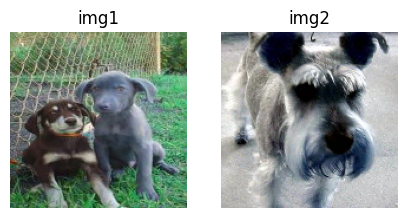

In [40]:
# Preprocess the image
path1 = 'C:/Users/navan/OneDrive/Escritorio/database/catdogs/test/dogs/'
path2 = 'C:/Users/navan/OneDrive/Escritorio/database/catdogs/test/dogs/'

img3 = 'C:/Users/navan/OneDrive/Documentos/TESIS/TesisDree/Scripts/v3/4_dog.jpg'
img4 = 'C:/Users/navan/OneDrive/Documentos/TESIS/TesisDree/Scripts/v3/4_cat.jpg'

rimg1 = random_image(path1, 1)
rimg1 = cv.resize(rimg1, dsize=(150, 150), interpolation=cv.INTER_CUBIC)
img1 = rimg1.astype('float32') / 255

rimg2 = random_image(path2, 1) 
rimg2 = cv.resize(rimg2, dsize=(150, 150), interpolation=cv.INTER_CUBIC)
img2 = rimg2.astype('float32') / 255
# plt.imshow(rimg1[0:150, 0:150, :])
show_imgs(img1, img2)

In [41]:
model = keras.models.load_model('catdog0.h5')

In [42]:
# Make the prediction
# print(np.array(img1))
# print(img1)
# print(np.array(img1).shape)
if round(model.predict(np.array([img1]))[0][0]) == 1:
    print('cat')
else:
    print('dog')

if round(model.predict(np.array([img2]))[0][0]) == 1:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 1s 1s/step
dog
1/1 [==============================] - 0s 38ms/step
dog


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import KFold

# Cargar el conjunto de datos
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Crear un modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

# Compilar el modelo
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Realizar validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in kfold.split(x_train):
    # Obtener los datos de validación
    x_val, y_val = x_train[val_idx], y_train[val_idx]
    # Entrenar el modelo
    model.fit(x_train[train_idx], y_train[train_idx], epochs=5)
    # Evaluar el modelo
    model.evaluate(x_val, y_val)